Lab Experiment 9: Linear Regression for Housing Price Prediction

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Missing values per column:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20

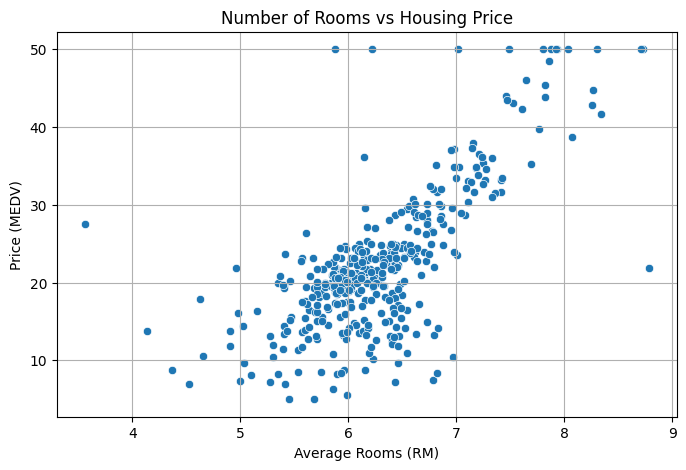


--- Baseline Model (with outliers) ---
MSE: 31.454047664950963
R² Score: 0.627084994167318


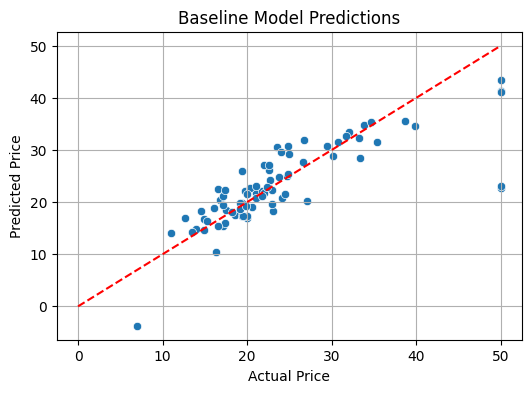


After removing outliers: 214 rows remain.

--- Model After Outlier Removal ---
MSE: 5.098328945973743
R² Score: 0.7824596647797841


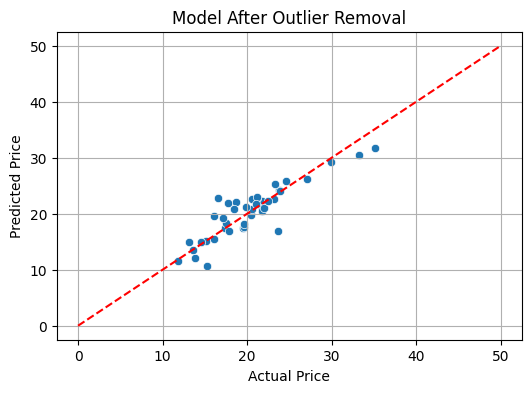


--- Model After Feature Scaling ---
MSE: 5.098328945973737
R² Score: 0.7824596647797843


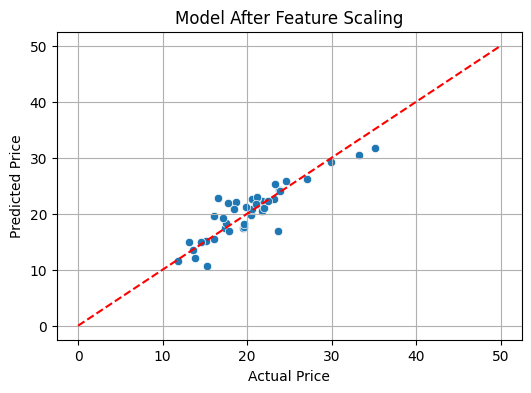

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

# Step 1: Load the dataset
df = pd.read_csv("HousingData.csv")

# Step 2: Show basic info and missing values
print("Original Data Info:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# Step 3: Drop missing values
df_clean = df.dropna()
print(f"\nAfter dropping missing values: {df_clean.shape[0]} rows remain.")

# Step 4: Define features and target
X = df_clean.drop(columns=["MEDV"])
y = df_clean["MEDV"]

# Step 5: Visualize feature vs target (e.g., RM vs MEDV)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x="RM", y="MEDV")
plt.title("Number of Rooms vs Housing Price")
plt.xlabel("Average Rooms (RM)")
plt.ylabel("Price (MEDV)")
plt.grid(True)
plt.show()

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train baseline linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Step 8: Evaluate baseline model
print("\n--- Baseline Model (with outliers) ---")
print("MSE:", mean_squared_error(y_test, y_pred_baseline))
print("R² Score:", r2_score(y_test, y_pred_baseline))

# Plot actual vs predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_baseline)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Baseline Model Predictions")
plt.plot([0, 50], [0, 50], 'r--')
plt.grid(True)
plt.show()

# Step 9: Outlier Removal using IQR method
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"\nAfter removing outliers: {df_no_outliers.shape[0]} rows remain.")

# Redefine features and target
X_no = df_no_outliers.drop(columns=["MEDV"])
y_no = df_no_outliers["MEDV"]

X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.2, random_state=42)

# Train model on cleaned data
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no, y_train_no)
y_pred_no = model_no_outliers.predict(X_test_no)

# Evaluate
print("\n--- Model After Outlier Removal ---")
print("MSE:", mean_squared_error(y_test_no, y_pred_no))
print("R² Score:", r2_score(y_test_no, y_pred_no))

# Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_no, y=y_pred_no)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model After Outlier Removal")
plt.plot([0, 50], [0, 50], 'r--')
plt.grid(True)
plt.show()

# Step 10: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no)
X_test_scaled = scaler.transform(X_test_no)

# Train model after scaling
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_no)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluate
print("\n--- Model After Feature Scaling ---")
print("MSE:", mean_squared_error(y_test_no, y_pred_scaled))
print("R² Score:", r2_score(y_test_no, y_pred_scaled))

# Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_no, y=y_pred_scaled)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model After Feature Scaling")
plt.plot([0, 50], [0, 50], 'r--')
plt.grid(True)
plt.show()
